# Lecture 7

This week, we'll have a running Colab that we can all try understanding concepts with.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_training.txt
!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_QC.txt
!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/muvec.txt


--2023-02-23 03:01:06--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_training.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1027392 (1003K) [text/plain]
Saving to: ‘bubblegum_training.txt.1’

bubblegum_training. 100%[===================>]   1003K  2.31MB/s    in 0.4s    

2023-02-23 03:01:07 (2.31 MB/s) - ‘bubblegum_training.txt.1’ saved [1027392/1027392]

--2023-02-23 03:01:07--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-6/bubblegum_QC.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1028 (1.0K) [text/plain]
Saving to: ‘bubblegum_QC.txt.1’

bubblegum_QC.txt.1  100%[===================>]   1.00K  --.-KB/s    in 0s      

2023

# The Data

This is data from a factory that manufactures peach bubblegum en masse, DripperLabs. There are ten features that are measured for each sample off the factory floor; these correspond to:

* Resin - main chewable part
* Wax - gum softener
* Elastomer - flexibility
* Sweeteners - delays the release of flavour. 
* Glycerine - maintains moistness. 
* Softener - soften the gum
* Plasticiser -  increases flexibility 
* Flavours - taste and sensory appeal
* Colours - visual appeal. 
* Polyol Coating - maintain the quality 

If you'd like to read more, feel free to review [GooRoo's blog post](https://www.gooroo.com/blog/chewing-gum/)


In [ ]:
train_data = np.loadtxt("bubblegum_training.txt",delimiter=",")
inference_data = np.loadtxt("bubblegum_QC.txt", delimiter=",")

# To sanity check, load in the known target values
mean_data = np.loadtxt("muvec.txt", delimiter=",")

# Calculate the parameters of your Gaussian Model

Using the training data, determine the maximum likelihood of the mean and standard deviation for each dimension.

Recall that these are:

$$\mu_i = \sum_{n=1}^N \frac{x^{(n)}_i}{N}$$

and

$$\sigma_i^2 = \sum_{n=1}^N \frac{(x^{(n)}_i - \mu_i) ^2}{N} $$

In [ ]:
# YOUR CODE HERE
mu = train_data.mean(axis=0)
sig = train_data.std(axis=0)

# Probability of a Sample

Write a function that takes your parameters and calculates the probabiliy of this sample occurring with the Gaussian Model. If all goes well, you should have the following outliers:

`[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]`

You may wish to use the log likelihood (i.e., take the log of your PDF).

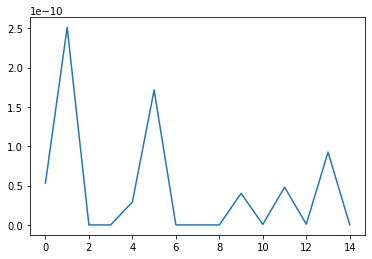

In [ ]:
# YOUR CODE HERE

from scipy.stats import multivariate_normal
model = multivariate_normal(mean = mu, cov = np.eye(10)*sig**2)

plt.plot(model.pdf(inference_data))
